<a href="https://colab.research.google.com/github/gannannavelorange/Project/blob/master/src/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question2


In [22]:
!git clone https://github.com/gannannavelorange/Project

Cloning into 'Project'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 36 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [23]:
cd Project/src

/content/Project/src/Project/src


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy.stats import norm
import csv


In [25]:
def gbs(option_type, fs, x, t, r, b, v):
    t__sqrt = math.sqrt(t)
    d1 = (math.log(fs / x) + (b + (v * v) / 2) * t) / (v * t__sqrt)
    d2 = d1 - v * t__sqrt

   
    if option_type == 1:
        
        value = fs * math.exp((b - r) * t) * norm.cdf(d1) - x * math.exp(-r * t) * norm.cdf(d2)
        delta = math.exp((b - r) * t) * norm.cdf(d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) - (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(d1) - r * x * math.exp(-r * t) * norm.cdf(d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = x * t * math.exp(-r * t) * norm.cdf(d2)
    else:
      
        value = x * math.exp(-r * t) * norm.cdf(-d2) - (fs * math.exp((b - r) * t) * norm.cdf(-d1))
        delta = -math.exp((b - r) * t) * norm.cdf(-d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) + (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(-d1) + r * x * math.exp(-r * t) * norm.cdf(-d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = -x * t * math.exp(-r * t) * norm.cdf(-d2)

    return value, delta, gamma, theta, vega, rho

In [27]:
#ATM volatility
def init_vol(t,C,F):
  v=2/math.sqrt(t)*norm.ppf(1/2*(C/F+1))
  return v

In [28]:
def _approx_implied_vol(option_type, fs, x, t, r, b, cp):
  
    ebrt = math.exp((b - r) * t)
    ert = math.exp(-r * t)

    a = math.sqrt(2 * math.pi) / (fs * ebrt + x * ert)

    if option_type == 1:
        payoff = fs * ebrt - x * ert
    else:
        payoff = x * ert - fs * ebrt

    b = cp - payoff / 2
    c = (payoff ** 2) / math.pi

    v = (a * (b + math.sqrt(b ** 2 + c))) / math.sqrt(t)

    return v

In [29]:
ATM= _approx_implied_vol(1, 2900, 2900, 0.39285, 0.025, 0, 98.6)
print(ATM)

0.13731588717811868


In [30]:
# Call price=98.6 Future price=2900
ATMvol=init_vol(0.39285,98.6,2900)
print(ATMvol)

0.1360150517495224


In [31]:
def getdata():
  with open('Data.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:42]]
      col0=[float(c) for c in col0] # Strike
      col1=[row[1] for row in rows[1:42]]
      col1=[float(c) for c in col1] # Call price
      col2=[row[2] for row in rows[1:42]]
      col2=[float(c) for c in col2] # Put price
      
  return col0,col1,col2

In [32]:
#define an error function
def error_function(v,option_type, fs, x, t, r, b,theo_price):
  #gbm.vol_ratio = vol
  gbs_price=gbs(option_type, fs, x, t, r, b, v)
  return np.abs(theo_price - gbs_price[0])   #x is the x[i]

In [33]:
def implied_volatility(option_type, fs, x, t, r, b,theo_price):
  initial =ATMvol#initial guess
  return so.fmin(error_function, initial, args = (option_type, fs, x, t, r, b,theo_price), disp = 0)[0]

# A) Implied Volatility curve

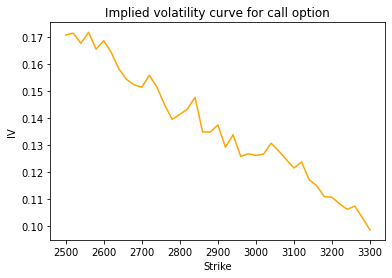

In [34]:
strike=getdata()[0]
callprice=getdata()[1]
putprice=getdata()[2]
iv=[]
ivp=[]
for i in range(0,41):
  iv.append(implied_volatility(1,2900,strike[i],0.39285, 0.025, 0,callprice[i]))
  ivp.append(implied_volatility(0,2900,strike[i],0.39285, 0.025, 0, putprice[i]))

plt.plot(strike,iv,'orange')
plt.xlabel('Strike')
plt.ylabel('IV')
plt.title('Implied volatility curve for call option')
#plt.legend()
plt.show()

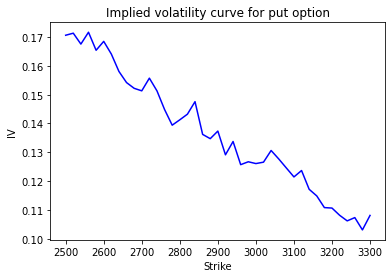

In [35]:
plt.plot(strike,ivp,'blue')
plt.xlabel('Strike')
plt.ylabel('IV')
plt.title('Implied volatility curve for put option')
#plt.legend()
plt.show()

# D) Arbitrage Opportunities

In [36]:

ir= 0.025
T=0.39285
F=2900 

arbitrage=[]
ar2=[]
for i in range(0,41):
  #arbitrage.append(strike[i]*np.exp(-ir*T)-F*np.exp(-ir*T)-putprice[i]+callprice[i])
  arbitrage.append((strike[i]-F)*np.exp(-ir*T)-putprice[i]+callprice[i])
  ar2.append((100*F-100*strike[i])*np.exp(-ir*T)+100*putprice[i]-100*callprice[i])
print(arbitrage)
print(putprice) 

[-0.0007283898851255799, -0.006191970390830193, -0.0016555508966007437, -0.0071191314023053565, -0.002582711908132751, 0.0019537075862103848, 0.006490127080496677, 0.0010265465746783775, 0.005562966068907826, 9.938556320321368e-05, 0.004635805057461084, -0.0008277754482719502, 0.0037086440459574987, -0.0017549364597755357, -0.007218516965536992, -0.0026820974712791212, -0.008145677977012156, -0.0036092584827827068, -0.9990728389885106, -0.004536419494257871, 0.0, 0.004536419494257871, -0.0009271610114893747, 0.003609258482768496, -0.0018543220229858548, 0.0026820974712862267, -0.002781483034468124, 0.0017549364597613248, 0.006291355954033406, 0.0008277754482755029, -0.004635805057457532, -9.938556321742453e-05, -0.0055629660689380245, -0.0010265465747085756, 0.003509872919524426, -0.0019537075861855158, 0.002582711908068802, -0.002880868597676667, 0.0016555508965665489, -0.003808029609203789, -0.9992716101148744]
[10.73, 12.86, 13.91, 17.69, 18.22, 22.4, 23.95, 24.92, 26.98, 30.16, 34.

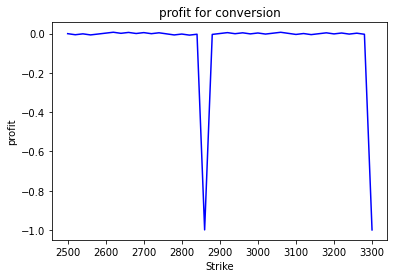

In [37]:
plt.plot(strike,arbitrage,'blue')
plt.xlabel('Strike')
plt.ylabel('profit')
plt.title('profit for conversion')
#plt.legend()
plt.show()

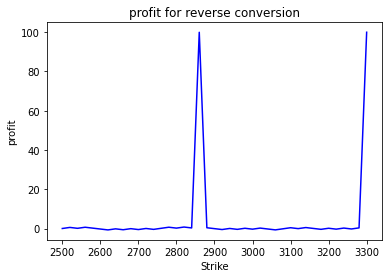

In [38]:
plt.plot(strike,ar2,'blue')
plt.xlabel('Strike')
plt.ylabel('profit')
plt.title('profit for reverse conversion')
#plt.legend()
plt.show()

[-406.8207283898851, -389.1461919703908, -370.3916555508966, -354.3671191314023, -335.0925827119081, -319.4680462924138, -301.21350987291953, -282.3789734534253, -264.6344370339311, -248.0099006144368, -232.29536419494255, -219.94082777544827, -203.17629135595405, -185.46175493645978, -168.64721851696552, -156.89268209747127, -145.87814567797702, -137.20360925848277, -118.18907283898851, -106.60453641949425, -98.6, -83.44546358050574, -78.1509271610115, -64.52639074151723, -57.96185432202299, -50.89731790252871, -45.17278148303447, -42.19824506354024, -35.40370864404596, -29.189172224551726, -23.69463580505746, -21.390099385563218, -15.565562966068939, -12.281026546574708, -8.966490127080476, -7.341953707586185, -5.427417288091931, -4.0128808685976765, -3.3983444491034334, -2.143808029609204, -2.2492716101148744]


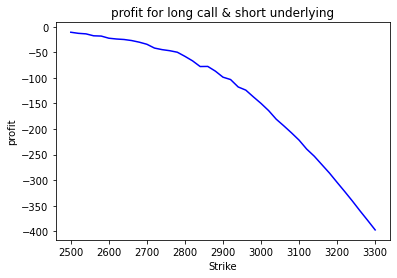

In [39]:
singlecall=[]
singleput=[]
for i in range(0,41):
  singlecall.append((F-strike[i])*np.exp(-ir*T)-callprice[i])
  singleput.append((strike[i]-F)*np.exp(-ir*T)-putprice[i])
print(singleput) 
plt.plot(strike,singlecall,'blue')
plt.xlabel('Strike')
plt.ylabel('profit')
plt.title('profit for long call & short underlying')
#plt.legend()
plt.show()

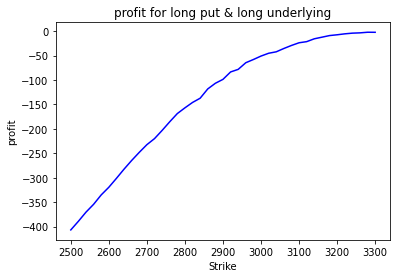

In [40]:
plt.plot(strike,singleput,'blue')
plt.xlabel('Strike')
plt.ylabel('profit')
plt.title('profit for long put & long underlying')
#plt.legend()
plt.show()

# E) gamma vega delta theta

In [41]:
deltaC=[]
gammaC=[]
thetaC=[]
vegaC=[]
deltaP=[]
gammaP=[]
vegaP=[]
thetaP=[]

for i in range(0,41):
 deltaC.append(gbs(1,2900,strike[i],0.39285, 0.025, 0,iv[i])[1])
 gammaC.append(gbs(1,2900,strike[i],0.39285, 0.025, 0,iv[i])[2])
 vegaC.append(gbs(1,2900,strike[i],0.39285, 0.025, 0,iv[i])[4])
 deltaP.append(gbs(0,2900,strike[i],0.39285, 0.025, 0,ivp[i])[1])
 gammaP.append(gbs(0,2900,strike[i],0.39285, 0.025, 0,ivp[i])[2])
 vegaP.append(gbs(0,2900,strike[i],0.39285, 0.025, 0,ivp[i])[4])
 thetaC.append(gbs(1,2900,strike[i],0.39285, 0.025, 0,ivp[i])[3])
 thetaP.append(gbs(0,2900,strike[i],0.39285, 0.025, 0,ivp[i])[3])


In [42]:
print(deltaC)
print(deltaP)
print(gammaC)
print(gammaP)
print(vegaC)
print(vegaP)
print(iv)
print(ivp)

[0.9162033601334206, 0.9044224093011759, 0.896825321015227, 0.8787399010620237, 0.8723203486144013, 0.852989663157964, 0.8421636266765242, 0.8325591280733706, 0.818839718028462, 0.8012144157923362, 0.7806615433803088, 0.7522583599486545, 0.73355937822166, 0.7154935525818918, 0.694174203179773, 0.6636901291913049, 0.6330288635763746, 0.6013621895920274, 0.5761683204202818, 0.5440428076648399, 0.5121136121990916, 0.4775600030559497, 0.44723096511863536, 0.4087028172700148, 0.377239472852038, 0.3450572974501511, 0.3155420722744725, 0.2934527089344318, 0.2614625546578762, 0.2297179081426555, 0.1989965555338222, 0.18104285348686852, 0.14626781751121373, 0.12245849599805983, 0.0971525657924639, 0.08221263082839458, 0.06485320985813564, 0.05076772037886855, 0.04360261719658401, 0.030121266938110503, 0.019446729785486793]
[-0.07402618397790871, -0.08583006399873368, -0.09340748626990199, -0.11151221988115706, -0.11792030252782307, -0.1372223469477437, -0.14804138671047354, -0.15766485925296997

# H)

In [50]:
cost=-gbs(1, 2900,2900,0.0595,0.0025, 0.0025, 0.13736)[0]-gbs(1, 2900,2900,0.0595,0.0025, 0.0025, 0.13736)[0]
print(cost)
FV=cost*100*np.exp(0.0595*0.0025)
#print(FV)

-77.9504015376906


In [ ]:
def getdata1():
  with open('AAPL.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:59]]
      col0=[float(c) for c in col0] # Strike
      col1=[row[1] for row in rows[1:59]]
      col1=[float(c) for c in col1] # Call price
      
      
  return col0,col1